# Сборный проект. Анализ интернет-магазина "Стримчик".

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

 **Описание данных** 

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## Шаг 1. Открытие файла с данными и изучение общей информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import math
from scipy import stats as st
from matplotlib import rcParams, rcParamsDefault

In [2]:
#Для отображения графиков.
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
#Для декорирования графиков.
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Посмотримм названия колонок, для проверки на соответствие описанию.
print(data.columns)
print('_______________________________________________________________________________')
print(data.shape)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
_______________________________________________________________________________
(16715, 11)


Названия колонок в файле соответствуют заявленным изначально.

In [6]:
#Узнаем, сколько пропусков есть в данных.
print(data.isna().sum().sort_values(ascending=False))
print('___________________________________')

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64
___________________________________


In [7]:
#Посмотрим все столбцы таблицы, чтобы понимать, как они выглядят.
pd.set_option('display.max_columns', None)
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод к Шагу 1.

В таблице всего 16715 строк, но в шести из одиннадцати колонок есть пропущенные данные. Кроме того, названия некоторых колонок оформлены неправильно, а некоторые колонки имеют неверный тип данных.

## Шаг 2. Подготовка данных.

### Переименование столбцов.

In [8]:
data.columns = data.columns.str.lower()


print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Поиск дубликатов.

In [9]:
data.duplicated().sum()

0

In [10]:
#Дубликаты по названию игр.
data['name'].value_counts()

Need for Speed: Most Wanted                                   12
FIFA 14                                                        9
Ratatouille                                                    9
Madden NFL 07                                                  9
LEGO Marvel Super Heroes                                       9
                                                              ..
Kingdom Hearts: Birth by Sleep                                 1
Spy Kids 3-D: Game Over                                        1
Atelier Iris 3: Grand Phantasm (US Sales)                      1
Naruto Shippuden: Kizuna Drive                                 1
Broken Sword: Shadows of the Templars - The Director's Cut     1
Name: name, Length: 11559, dtype: int64

Меня интересует, почему в таблице одно и то же название игры встречается более десяти раз. Поскольку я не играю в игры, я буду анализировать только данные из таблицы, чтобы понять, почему это происходит. У меня нет собственных предположений о причинах этого явления.

In [11]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Я предполагаю, что игра имела две версии, одна из которых была выпущена в 2005 году, а другая - в 2012 году. Разница между ними заключается в платформах, на которых они были выпущены. Следовательно, мы можем оставить эти данные без изменений.

Названия колонок приведены к нижнему регистру.

Явных дубликатов не выявлено.

In [12]:
# Посмотрим дубликаты по названию, платформе и дате релиза.
data.loc[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Обнаружены два случая дублирования данных по колонкам с названиями игры, платформы и годом выпуска. Посмотрим наличие повторяющихся строк.

In [13]:
data.loc[
    ((data['name'].isna()) & 
    (data['platform'] == 'GEN') & 
    (data['year_of_release'] == 1993)) | 
    ((data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012))
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [14]:
data = data.drop([data.index[16230], data.index[14244],data.index[659]])
data.loc[
    ((data['name'].isna()) & 
    (data['platform'] == 'GEN') & 
    (data['year_of_release'] == 1993)) | 
    ((data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012))
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


### Изменение типов данных в столбцах.

Изменим типы данных в двух столбцах таблицы.

Год выпуска (year_of_release) должен быть представлен целым числом, но сейчас он указан как число с плавающей точкой (float). 

Оценка пользователей (user_score) имеет тип объекта, но должна быть представлена как число с плавающей точкой (float).

In [15]:
#Удалим значения, где год выпуска игры отсутствует, возможно, это тех.ошибка.
data.dropna(subset=['year_of_release'], inplace=True)
#Меняем тип для года выпуска.
data['year_of_release'] = data['year_of_release'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Тип данных в столбце year_of_release изменен на int.

In [16]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы заметили наличие значения 'tbd' в данных. Это сокращение от английского 'To be determined', что означает 'Подлежит определению'. Замена этих значений на '0' будет неверной, поскольку это значительно исказит статистику. Удаление этих строк также нелогично. Вместо этого, мы заменим 'tbd' на специальный символ 'NaN', который обозначает отсутствующее значение.

In [17]:
#Замена tbd на NaN.
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

#Меняем тип столбца.
data['user_score'] = data['user_score'].astype('float')

Тип данных в столбце user_score изменен на float.

**Исследование типа данных в столбце сritic_score.**

In [18]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Столбец сritic_score содержит целые числа, представленные в формате с плавающей запятой. На данный момент мы оставим эти значения в том же типе данных.

### Обработка пропусков.

В ходе первого этапа проекта мы обнаружили, что в шести колонках таблицы присутствуют пропущенные данные. Значительное количество пропусков наблюдается в столбцах 'critic_score', 'rating' и 'user_score'. Эти пропуски исчисляются тысячами. Незначительное количество пропущенных значений присутствует также в столбцах 'Year_of_Release', 'Name' и 'Genre'.

In [19]:
#print(data.isna().sum().sort_values(ascending=False))

В столбце 'critic_score', где содержатся оценки критиков, пропущенные значения являются значимыми и не могут быть заменены. Поэтому мы оставим их без изменений, чтобы избежать искажения анализа.

Аналогично, в столбце 'rating', где указан рейтинг от организации ESRB, и в столбце 'user_score', где содержатся оценки пользователей, пропущенные значения также важны и не могут быть заменены. Их удаление может существенно исказить анализ. 

Однако, в столбцах 'name' и 'genre', где количество пропущенных значений незначительно, мы можем удалить строки с пропусками, так как это не повлияет на общую статистику.

In [20]:
data.dropna(subset=['name', 'genre'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [21]:
print(data.shape)

(16443, 11)


Количество элементов уменьшилось с 16715 до 16444, что составляет потерю менее 2%.

### Добавление столбца с суммарными продажами.

Для подсчета общих продаж во всех регионах мы создадим новый столбец под названием 'total_sales'. В этот столбец будут внесены суммы продаж по каждому региону для каждой игры. Регионы включают Северную Америку (na_sales), Европу (eu_sales), Японию (jp_sales) и другие регионы (other_sales).

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Столбец с суммарными продажами добавлен в таблицу.

### Вывод к Шагу 2.

Все названия столбцов были приведены к нижнему регистру.

Явных дубликатов не обнаружено.

Типы данных в двух столбцах таблицы были изменены.

Год выпуска (year_of_release) был преобразован из числа с плавающей точкой (float) в целое число.

В столбце user_score значение 'tbd' было заменено на 'nan', и тип данных был изменён на float.

Пропуски в столбцах 'name' и 'genre' были удалены, так как их количество было незначительным.

Суммарные продажи во всех регионах были подсчитаны и записаны в столбец total_sales.


## Шаг 3. Исследовательский анализ данных.

### Вопрос 1.

"Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?"

Мы хотим проанализировать, сколько игр было выпущено в различные годы. Сначала нам нужно определить временной период, за который нам нужны данные для дальнейшего анализа.

In [23]:
#В какие годы выходило больше всего игр?
data['year_of_release'].value_counts().head(10)


2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

Больше всего игр было выпущено в период с 2006 по 2011 год. Более детально рассмотрим распределение игр по годам.

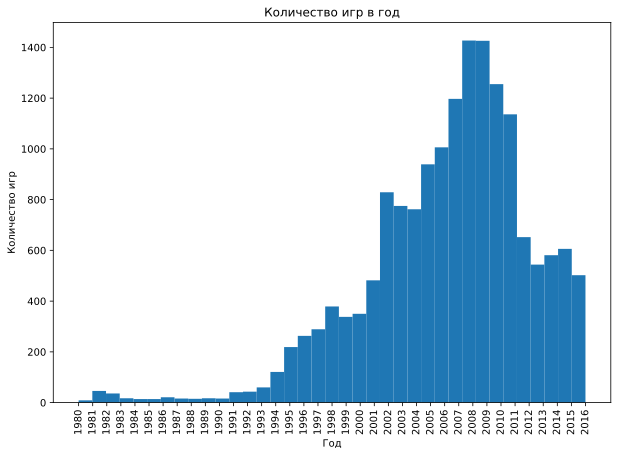

In [24]:
data['year_of_release'].plot(kind='hist', bins=37, figsize=(10,7))
plt.title('Количество игр в год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.locator_params(axis='x', nbins=37)

years = data['year_of_release'].unique()
plt.xticks(years, rotation=90)

plt.show()

Мы наблюдаем снижение объема выпускаемых игр с начала 2012 года до 2015 года. Однако, в 2016 году отмечается положительная тенденция к увеличению количества игр. Причина резкого снижения числа выпущенных игр остается неизвестной из-за недостатка данных. Возможно, это связано с изменениями на рынке платформ или появлением новых активных платформ, которые не были учтены в наших данных. Для проведения анализа мы будем использовать данные за последние пять лет в качестве основного источника информации и данные за последние десять лет в качестве дополнительного источника. Остальные данные я бы исключила из рассмотрения.

### Вопрос 2.

"Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?"

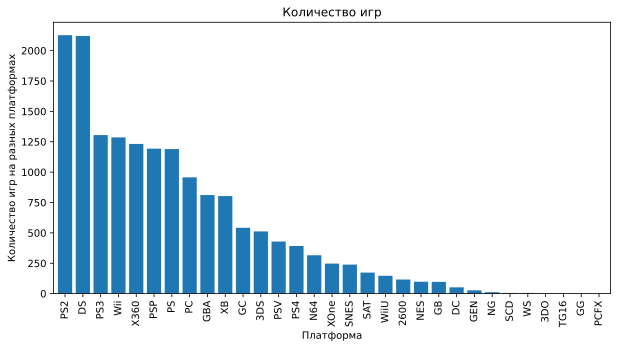

In [25]:
#На какой платформе чаще всего выходили игры?
data['platform'].value_counts().plot.bar(figsize=(10, 5), width=0.8)
plt.title('Количество игр')
plt.xlabel('Платформа')
plt.ylabel('Количество игр на разных платформах')
plt.show()

Больше всего игр выходило на платформах: PS2 и DS.

**Выявление наиболее прибыльных платформ.**

In [26]:
#Создаем датафрейм, хранящий в себе платформу и прибыль.
platform_top_sales = pd.pivot_table(data, index='platform', values='total_sales', aggfunc='sum') \
.sort_values(by='total_sales', ascending=False)
#Оставим только наиболее прибыльные 6 платформ.
platform_top_sales = platform_top_sales.head(6).reset_index()
platform_top_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [27]:
#Сохраняем список платформ из датафрейма выше.
platform_top_sales_unique = platform_top_sales['platform'].unique()
platform_top_sales_unique

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

<AxesSubplot:title={'center':'Прибыльность платформ'}, xlabel='Платформа', ylabel='Количество продаж, млн'>

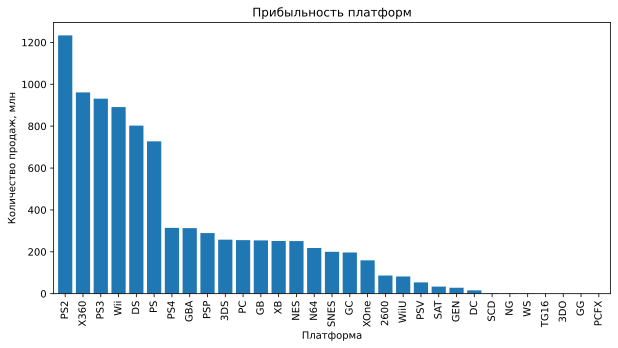

In [28]:
#Построим диаграмму 6 топовых по прибыли платоформ.
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False) \
.plot(kind='bar',figsize=(10,5), xlabel='Платформа', ylabel='Количество продаж, млн', title = "Прибыльность платформ", width=0.8)

Самые прибыльные платформы - PS2, X360, PS3, Wii, DS, PS.

Выясним за какой срок появляются новые и исчезают старые платформы.

In [29]:
#Создаем датафрейм, который покажет годы появления первой и последней игры по платформам.
platform_grouped = data.pivot_table(index=['platform'],values=['year_of_release'], aggfunc=[min, max])
#Убираем двойные названия колонок.
platform_grouped.columns = platform_grouped.columns.map('_'.join)
print(platform_grouped.columns)

Index(['min_year_of_release', 'max_year_of_release'], dtype='object')


In [30]:
#Посчитаем "средний" срок жизни платформы.
platform_grouped['alive'] = platform_grouped['max_year_of_release'] - platform_grouped['min_year_of_release']
platform_grouped['alive'].mean().round(1)

7.6

Средний срок жизни по всем платформам = 7,6 лет.

In [31]:
platform_grouped.head(10)

,min_year_of_release,max_year_of_release,alive
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


**Определение лидирующих платформ по продажам.**

Ранее мы уже определили, какие игровые платформы являются наиболее прибыльными. Теперь мы хотим визуализировать прибыль этих платформ по годам, чтобы наглядно увидеть, как менялась их доходность с течением времени.

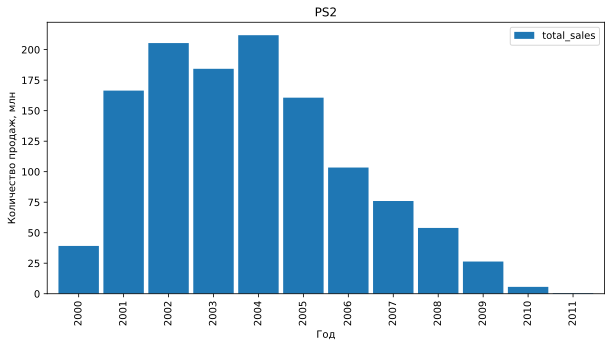

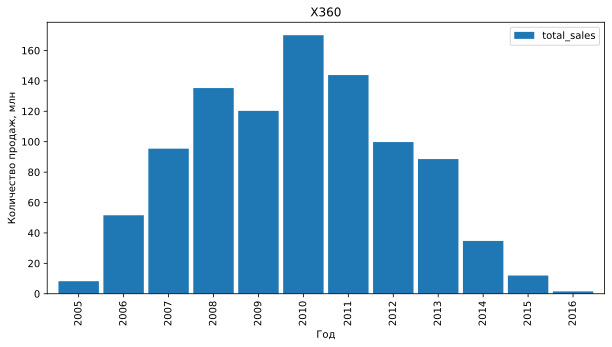

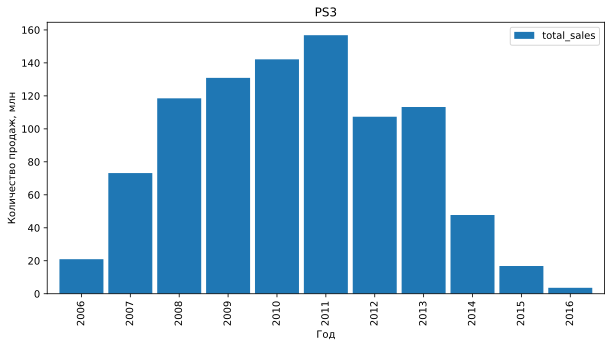

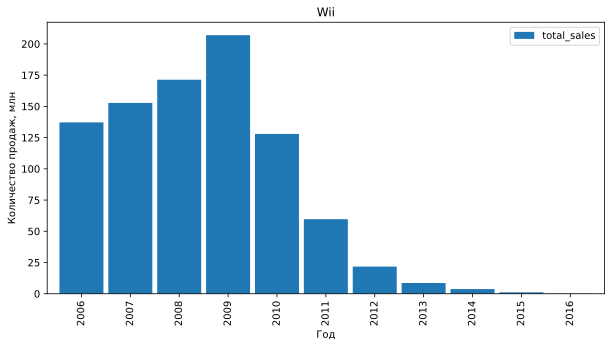

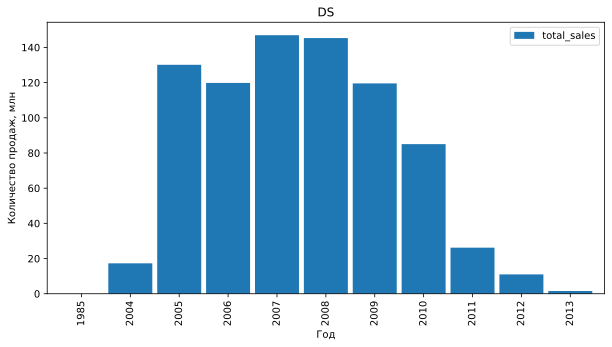

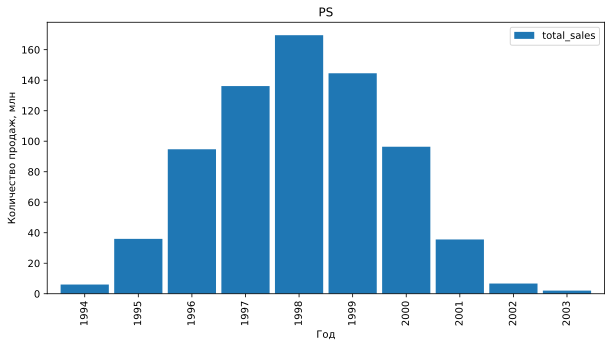

In [32]:
#Создаем цикл, для каждой из топовых платформ.
for platform in platform_top_sales_unique:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(kind='bar', figsize=(10,5), xlabel='Год', ylabel='Количество продаж, млн', width=0.9)
    plt.title(platform)

<AxesSubplot:title={'center':'Количество проданных копий игр на различных платформах в разрезе по годам'}, xlabel='год', ylabel='Количество проданных копий'>

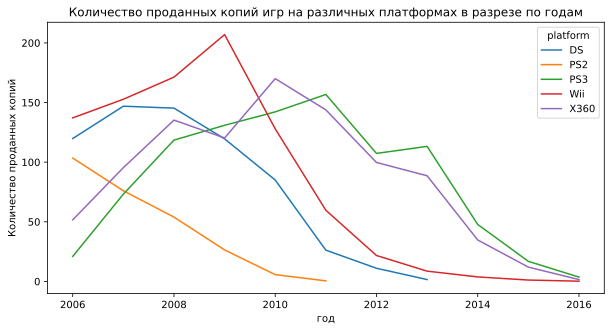

In [33]:
#Построим сравнительную диаграмму лиенейного формата.
#2016 год не берем в анализ, т.к. он не кончился.
top6_data = data.query('platform in @platform_top_sales_unique and year_of_release >= 2006')
top6_data_pivot_table = data.query('platform in @platform_top_sales_unique and year_of_release >= 2006').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(10, 5), xlabel = 'год', ylabel = "Количество проданных копий", title = "Количество проданных копий игр на различных платформах в разрезе по годам")
top6_data_pivot_table

На платформах, которые являются наиболее прибыльными, наблюдается значительное снижение доходности от игр за последние десять лет. Учитывая, что ранее мы определили средний срок жизни игровой платформы, можно предположить, что существуют платформы, которые сейчас находятся на пике своей прибыли, но не вошли в список самых прибыльных за весь период. Это говорит о необходимости сократить исследуемый период, чтобы исключить платформы, которые уже не пользуются высоким спросом (старше пяти лет).

In [34]:
allplatf_data = data.query('year_of_release >= 2012').pivot_table(index='year_of_release', columns = 'platform', \
                                                                  values='total_sales', aggfunc='sum')
allplatf_data

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:title={'center':'Динамика продаж на различных платформах по годам'}, xlabel='Год', ylabel='Количество продаж, млн'>

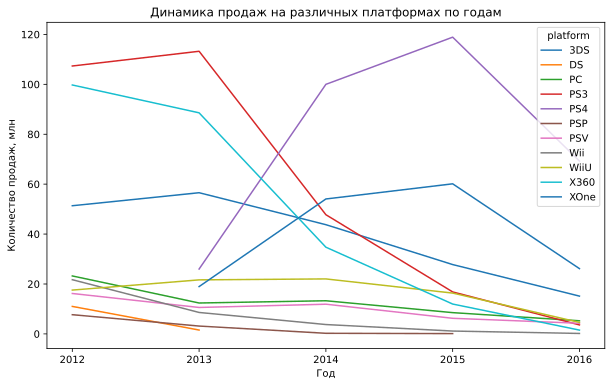

In [35]:
ticks = allplatf_data.index
allplatf_data.plot(figsize=(10, 6), xticks=ticks, xlabel='Год', \
                   ylabel='Количество продаж, млн', title = "Динамика продаж на различных платформах по годам")

In [36]:
#from heapq import nlargest
allplatf_data = data.query('year_of_release == 2015').pivot_table(index='platform', columns = 'year_of_release', values='total_sales', aggfunc='sum')
allplatf_data

year_of_release,2015
platform,
3DS,27.78
PC,8.52
PS3,16.82
PS4,118.90
PSP,0.12
PSV,6.25
Wii,1.14
WiiU,16.35
X360,11.96


Наше предположение оказалось верным для решения поставленной задачи. Мы заметили, что за последние два года две платформы - PlayStation 4 (PS4) и Xbox One (XOne) - активно набирают обороты в плане прибыли. Это подтверждает нашу гипотезу о том, что новые платформы могут быстро стать лидерами рынка.

### Вопрос 3.

"Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам."

In [37]:
#Создаем новый датафрейм из ранее созданного среза top6_data (в котором хранятся данные по 6 топовым платформам)
act_data = top6_data.query('year_of_release >= 2012').reset_index(drop=True)
act_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
4,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
864,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
865,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
866,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
867,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


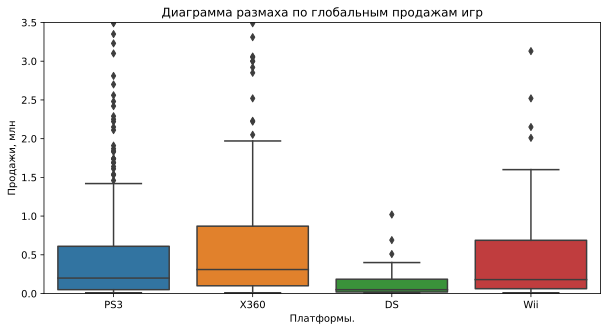

In [38]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=act_data, x='platform', y='total_sales')

plt.ylim(0, 3.5)

plt.title('Диаграмма размаха по глобальным продажам игр')
plt.xlabel('Платформы.')
plt.ylabel('Продажи, млн')

plt.show()

In [39]:
#Обновим датафрейм, который будет хранить данные по самым прибыльные платформам, представленных в выборке с 2006 года.
#top6_data = data.query('platform in @platform_top_sales_unique and year_of_release >= 2006 and year_of_release < 2016')
#top6_data

### Вопрос 4.

"Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы."

Изучим, как отзывы пользователей и критиков влияют на продажи игр внутри одной популярной платформы, используя в качестве примера платформу Xbox 360 (X360).

In [40]:
#Корреляция между оценками пользователей и продажами. 
data_X360 = top6_data[top6_data['platform']=='X360']
coor_user_data_X360 = data_X360['user_score'].corr(data_X360['total_sales']).round(2)
print(f'Корреляция продаж с оценками от пользователей = {coor_user_data_X360}')

Корреляция продаж с оценками от пользователей = 0.12


In [41]:
#Корреляция между оценками критиков и продажами 
coor_user_data_X360 = data_X360['critic_score'].corr(data_X360['total_sales']).round(2)
print(f'Корреляция продаж с оценками от критиков = {coor_user_data_X360}')

Корреляция продаж с оценками от критиков = 0.4


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Text(0.5, 1.0, 'Влияние отзывов критиков на продажи')

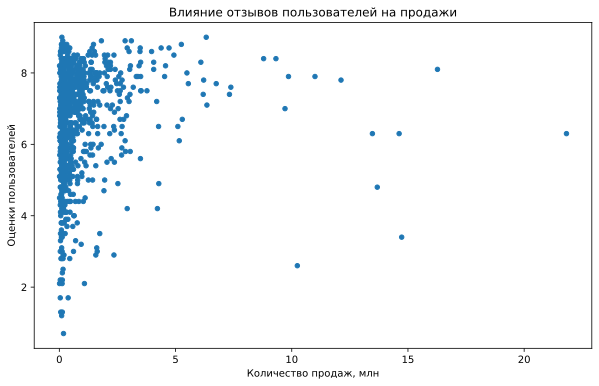

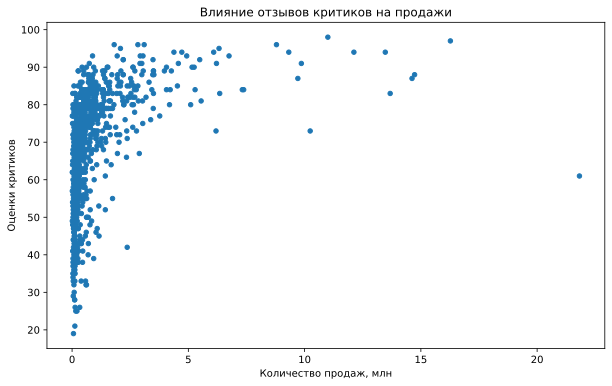

In [42]:
data_X360.plot(x='total_sales', y='user_score', kind='scatter', ylabel='Оценки пользователей', xlabel='Количество продаж, млн')
plt.title('Влияние отзывов пользователей на продажи')

data_X360.plot(x='total_sales', y='critic_score', kind='scatter', ylabel='Оценки критиков', xlabel='Количество продаж, млн')
plt.title('Влияние отзывов критиков на продажи')

Первый график демонстрирует больший разброс данных в оценках пользователей и прибыли. Проверим корреляцию на других платформах.

Корреляция продаж с оценками от пользователей = 0.09


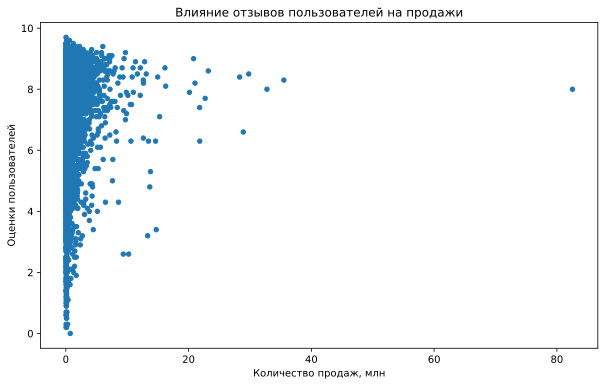

In [43]:
data.plot(x='total_sales', y='user_score', kind='scatter', ylabel='Оценки пользователей', xlabel='Количество продаж, млн')
plt.title('Влияние отзывов пользователей на продажи')

coor_user = data['user_score'].corr(data['total_sales']).round(2)
print(f'Корреляция продаж с оценками от пользователей = {coor_user}')

Корреляция продаж с оценками от критиков = 0.25


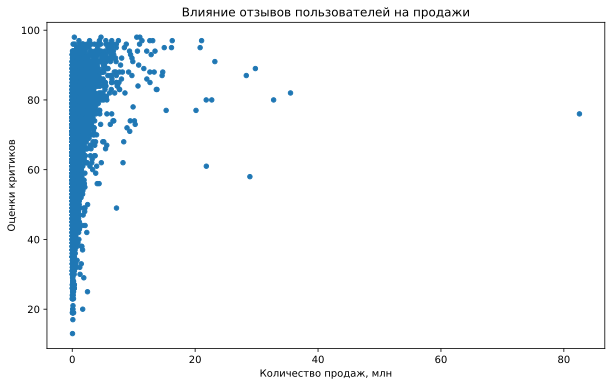

In [44]:
data.plot(x='total_sales', y='critic_score', kind='scatter', ylabel='Оценки критиков', xlabel='Количество продаж, млн')
plt.title('Влияние отзывов пользователей на продажи')

coor_user = data['critic_score'].corr(data['total_sales']).round(2)
print(f'Корреляция продаж с оценками от критиков = {coor_user}')

In [45]:

data_X360 = act_data[act_data['platform']=='X360']
print(f'Корреляция продаж на платформе X360 с оценками от пользователей =', data_X360['user_score'].corr(data_X360['total_sales']).round(2))
print(f'Корреляция продаж на платформе X360 с оценками от критиков =', data_X360['critic_score'].corr(data_X360['total_sales']).round(2))
print('_______________________________________________________________________________')
data_PS3 = act_data[act_data['platform']=='PS3']
print(f'Корреляция продаж на платформе PS3 с оценками от пользователей =', data_PS3['user_score'].corr(data_PS3['total_sales']).round(2))
print(f'Корреляция продаж на платформе PS3 с оценками от критиков =', data_PS3['critic_score'].corr(data_PS3['total_sales']).round(2))
print('_______________________________________________________________________________')
data_Wii = act_data[act_data['platform']=='Wii']
print(f'Корреляция продаж на платформе Wii с оценками от пользователей =', data_Wii['user_score'].corr(data_Wii['total_sales']).round(2))
print(f'Корреляция продаж на платформе Wii с оценками от критиков =', data_Wii['critic_score'].corr(data_Wii['total_sales']).round(2))

Корреляция продаж на платформе X360 с оценками от пользователей = 0.01
Корреляция продаж на платформе X360 с оценками от критиков = 0.36
_______________________________________________________________________________
Корреляция продаж на платформе PS3 с оценками от пользователей = -0.01
Корреляция продаж на платформе PS3 с оценками от критиков = 0.33
_______________________________________________________________________________
Корреляция продаж на платформе Wii с оценками от пользователей = 0.3
Корреляция продаж на платформе Wii с оценками от критиков = -0.42


In [46]:
data_DS = act_data[act_data['platform']=='DS']
print(f'Корреляция продаж на платформе DS с оценками от пользователей =', data_DS['user_score'].corr(data_DS['total_sales']).round(2))
#print(f'Корреляция продаж на платформе DS с оценками от критиков =', data_DS['critic_score'].corr(data_DS['total_sales']).round(2))

Корреляция продаж на платформе DS с оценками от пользователей = 0.88


К сожалению, корреляцию между продажами и оценками критиков для платформы Nintendo DS (DS) невозможно рассчитать. Если попытаться это сделать, программа выдает значение 'nan'.

In [47]:
data_DS = act_data[act_data['platform']=='DS']
data_DS = data_DS.dropna(subset=['critic_score'])
data_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
130,Pokemon Conquest,DS,2012,Role-Playing,0.56,0.05,0.37,0.04,80.0,8.2,E,1.02


Для платформ PlayStation 3 (PS3) и Xbox 360 (X360) наблюдается схожая корреляция между продажами и оценками критиков, а также между продажами и оценками пользователей. Однако, влияние оценок критиков на продажи незначительно, а оценки пользователей практически не оказывают влияния. Для платформы Wii корреляция между продажами и оценками пользователей, а также между продажами и оценками критиков выше, чем для PS3 и X360. Однако, влияние оценок пользователей и критиков на продажи также незначительно, при этом оценки критиков могут иметь обратную зависимость. Для платформы Nintendo DS (DS) можно отследить только высокую корреляцию между продажами и оценками пользователей (коэффициент корреляции равен 0,88).

### Вопрос 5.

"Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?"

Определим какой жанр игры является самым прибыльным. Выявим, выделяются ли жанры с высокими и низкими продажами.

In [48]:
act_data['genre'].value_counts()

Action          308
Sports          115
Shooter          99
Role-Playing     79
Adventure        63
Misc             53
Fighting         49
Racing           43
Simulation       22
Platform         21
Strategy         11
Puzzle            6
Name: genre, dtype: int64

Лидером продаж является игра в жанре Action. Также большое количество игр было выпущено в жанрах Sports, Shooter и Role-Playing .

<AxesSubplot:title={'center':'Динамика продаж игр с различными жанрами'}, xlabel='Жанр', ylabel='Количество продаж, млн'>

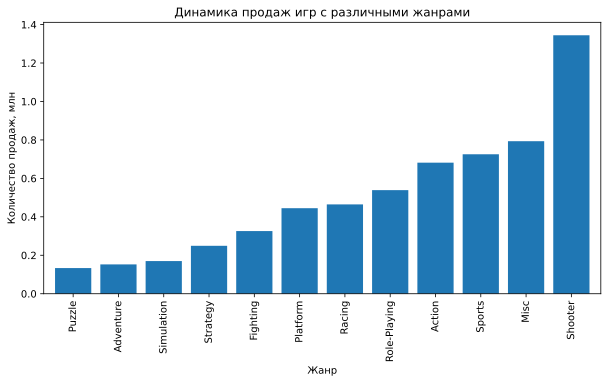

In [49]:
act_data.groupby('genre')['total_sales'].mean().sort_values().plot(kind='bar',figsize=(10,5), xlabel='Жанр', ylabel='Количество продаж, млн', title = "Динамика продаж игр с различными жанрами", width=0.8)

In [50]:
act_data.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,308.0,0.681558,1.739841,0.01,0.0575,0.250,0.7900,21.05
Adventure,63.0,0.152540,0.274579,0.01,0.0200,0.050,0.1400,1.64
Fighting,49.0,0.325918,0.329955,0.01,0.0700,0.220,0.4900,1.38
Misc,53.0,0.793396,1.746001,0.02,0.0500,0.190,0.4300,9.18
Platform,21.0,0.444762,0.534290,0.01,0.1000,0.180,0.5800,2.15
Puzzle,6.0,0.133333,0.258431,0.01,0.0200,0.030,0.0475,0.66
Racing,43.0,0.464651,0.713300,0.01,0.0700,0.180,0.4850,3.23
Role-Playing,79.0,0.538734,1.025168,0.01,0.0650,0.190,0.7600,8.06
Shooter,99.0,1.344343,2.558171,0.01,0.1500,0.420,1.4150,13.79


Самыми прибыльными жанрами игр оказались Shooter и Misc. Наименее прибыльными жанрами стали Adventure и Puzzle.

### Вывод к Шагу 3.

* Период наибольшего выпуска игр: С 2006 по 2011 год было выпущено наибольшее количество игр. Однако, начиная с 2012 года, наблюдается снижение объема выпускаемых игр, которое продолжалось до 2015 года. В 2016 году отмечается положительная тенденция к увеличению количества игр.
* Причины снижения выпуска игр: Причина резкого снижения числа выпущенных игр остается неизвестной из-за недостатка данных. Возможно, это связано с изменениями на рынке платформ или появлением новых активных платформ, которые не были учтены в наших данных.
* Анализ данных: Для проведения анализа мы использовали данные за последние три года в качестве основного источника информации и данные за последние десять лет в качестве дополнительного источника. Остальные данные мы исключили из рассмотрения.
* Наиболее популярные платформы: Больше всего игр было выпущено на платформах PlayStation 2 (PS2) и Nintendo DS.
* Самые прибыльные платформы: Самые прибыльные платформы - PlayStation 2 (PS2), Xbox 360 (X360), PlayStation 3 (PS3), Wii, Nintendo DS и PlayStation.
* Срок жизни платформ: Средний срок жизни по всем платформам составляет 7,6 лет.
* Динамика прибыльности платформ: На платформах, которые являются наиболее прибыльными, наблюдается значительное снижение доходности от игр за последние десять лет.
* Новые лидеры рынка: За последние два года две платформы - PlayStation 4 (PS4) и Xbox One (XOne) - активно набирают обороты в плане прибыли. Это подтверждает нашу гипотезу о том, что новые платформы могут быстро стать лидерами рынка.
* Самые прибыльные жанры: Самыми прибыльными жанрами игр оказались Shooter и Misc. Наименее прибыльными жанрами стали Adventure и Puzzle.

## Шаг 4. Составление портрета пользователя каждого региона.

У нас представлены данные по трем регионам:

* NA, Северная Америка
* EU, Европа
* JP, Япония

### Самые популярные платформы (топ-5) по регионам. Различия в долях продаж.

В исходной таблице представлены данные о продажах игр в трех регионах: Северной Америке (NA), Европе (EU) и Японии (JP). Наша задача - проанализировать долю продаж на пяти ведущих платформах в каждом из этих регионов за последние десять лет.

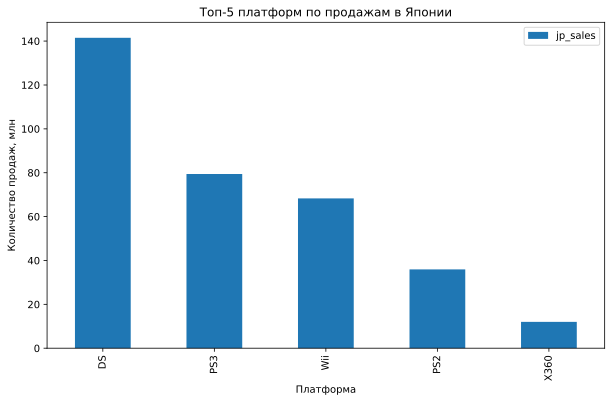

In [51]:
top6_data.groupby(by='platform').agg({'jp_sales':'sum'}). \
sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', xlabel = "Платформа", ylabel = "Количество продаж, млн")
plt.title('Топ-5 платформ по продажам в Японии')
plt.show()

В Японии наиболее прибыльными платформами являются: DS, PS3, Wii, PS2, X360.

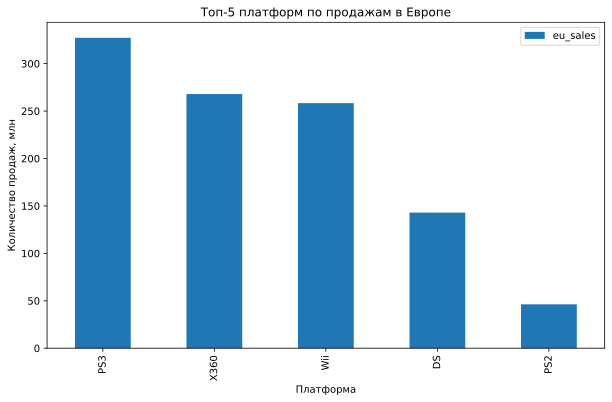

In [52]:
top6_data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Платформа", ylabel = "Количество продаж, млн")
plt.title('Топ-5 платформ по продажам в Европе')
plt.show()

В Европе наиболее прибыльными платформами являются: PS3, X360, Wii, DS, PS2.

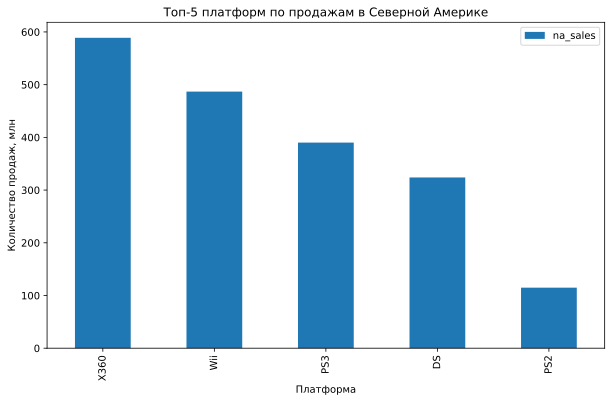

In [53]:
top6_data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().\
plot(kind='bar', xlabel = "Платформа", ylabel = "Количество продаж, млн")
plt.title('Топ-5 платформ по продажам в Северной Америке')
plt.show()

В Северной Америке наиболее прибыльными платформами являются: X360, Wii, PS3, DS, PS2.

### Самые популярные жанры (топ-5) по регионам.

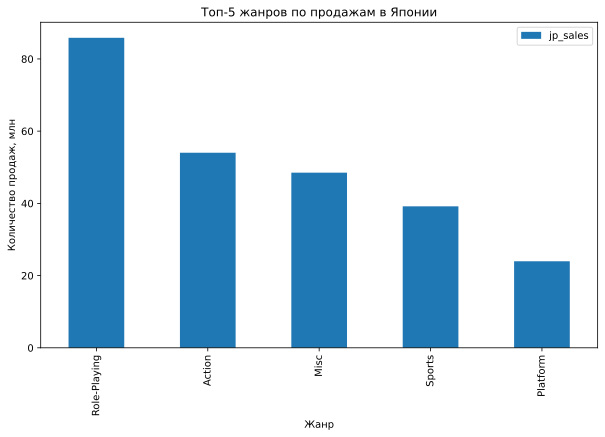

In [54]:
top6_data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Жанр", ylabel = "Количество продаж, млн")
plt.title('Топ-5 жанров по продажам в Японии')
plt.show()

В Японии самыми прибыльными жанрами за последние 10 лет являются: Role-Playing, Action, Misc, Sports, Platform.

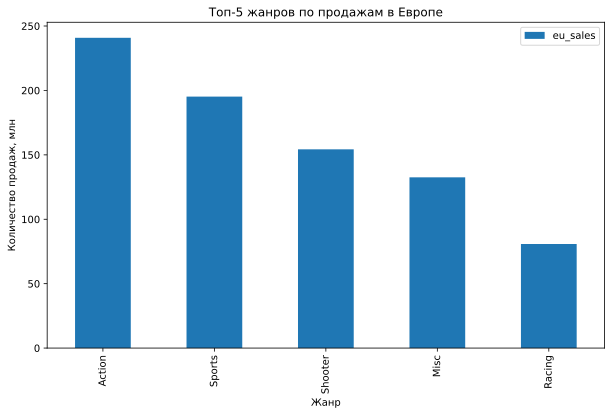

In [55]:
top6_data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()\
.plot(kind='bar', xlabel = "Жанр", ylabel = "Количество продаж, млн")
plt.title('Топ-5 жанров по продажам в Европе')
plt.show()

В Европе самыми прибыльными жанрами за последние 10 лет являются: Action, Sports, Shooter, Misc, Racing.

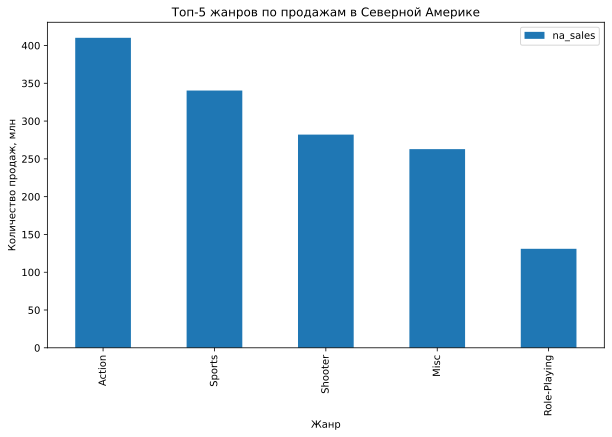

In [56]:
top6_data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Жанр", ylabel = "Количество продаж, млн")
plt.title('Топ-5 жанров по продажам в Северной Америке')
plt.show()

В Северной Америке самыми прибыльными жанрами за последние 10 лет являются: Action, Sports, Shooter, Misc, Role-Playing.

### Влияние рейтинга ESRB на продажи в регионах.

Расшифровки к рейтингам:

* «EC» («Early childhood») — «Для детей младшего возраста».

* «E» («Everyone») — «Для всех».

* «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».

* «T» («Teen») — «Подросткам 13–19 лет».

* «M» («Mature») — «От 17 лет».

* «AO» («Adults Only 18+») — «Только для взрослых».

* «RP» ( «Rating Pending») — «Рейтинг ожидается».

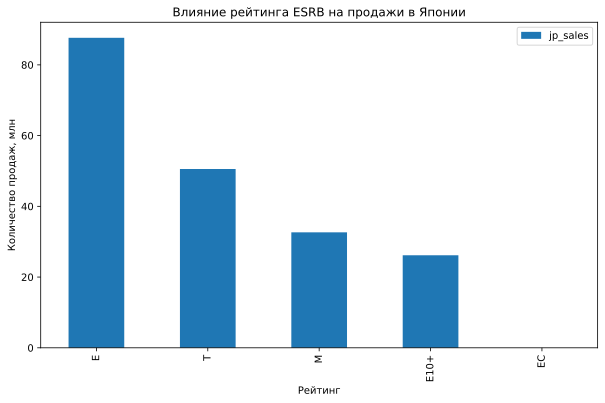

In [57]:
top6_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Рейтинг", ylabel = "Количество продаж, млн")
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.show()

Наиболее прибыльными в Японии являются игры с рейтингом ESRB: E - для всех, так же популярны M и T, т.е. для взрослых и для подростков.

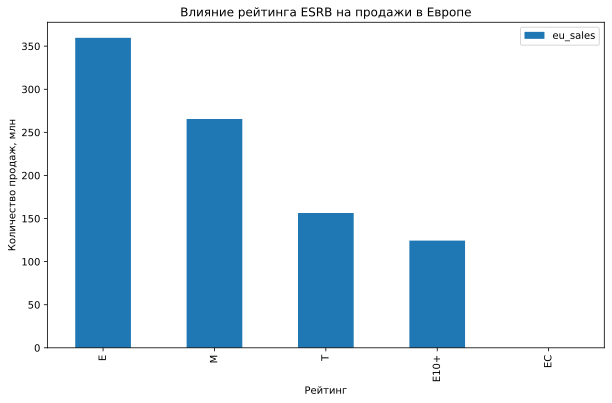

In [58]:
top6_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Рейтинг", ylabel = "Количество продаж, млн")
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.show()

Наиболее прибыльными в Европе являются игры с рейтингом ESRB: М и E, т.е. для взрослых и для всех.

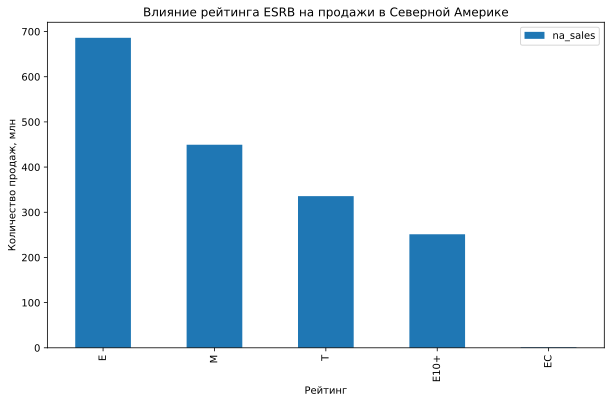

In [59]:
top6_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head() \
.plot(kind='bar', xlabel = "Рейтинг", ylabel = "Количество продаж, млн")
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.show()

Наиболее прибыльными в Северной Америке являются игры с рейтингом ESRB: М и E, т.е. для взрослых и для всех.

### Вывод к Шагу 4.

Портрет пользователя каждого региона:

* **Япония:** Пользователи в Японии предпочитают платформы Nintendo DS, PlayStation 3 (PS3), Wii, PlayStation 2 (PS2) и Xbox 360 (X360). Они выбирают игры в жанрах Role-Playing, Action, Misc, Sports и Platform. Игры с рейтингом ESRB E (для всех) и M (для взрослых) являются наиболее прибыльными в этом регионе.
* **Европа:** Пользователи в Европе предпочитают платформы PlayStation 3 (PS3), Xbox 360 (X360), Wii, Nintendo DS и PlayStation 2 (PS2). Они выбирают игры в жанрах Action, Sports, Shooter, Misc и Racing. Игры с рейтингом ESRB M (для взрослых) и E (для всех) являются наиболее прибыльными в этом регионе.
* **Северная Америка:** Пользователи в Северной Америке предпочитают платформы Xbox 360 (X360), Wii, PlayStation 3 (PS3), Nintendo DS и PlayStation 2 (PS2). Они выбирают игры в жанрах Action, Sports, Shooter, Misc и Role-Playing. Игры с рейтингом ESRB M (для взрослых) и E (для всех) являются наиболее прибыльными в этом регионе.

## Шаг 5. Проверка гипотез

**Гипотезы:**

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки обеих гипотез мы будем использовать t-критерий Стьюдента, поскольку выборки в обоих случаях независимы друг от друга. Пороговое значение альфа (уровень значимости) будет равно 0,05.

### Гипотеза 1.

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


* **Нулевая гипотеза (H0)** предполагает, что средние пользовательские рейтинги платформ Xbox One и PC равны. 
* **Альтернативная гипотеза (H1)** утверждает, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [60]:
user_score_Xbox = data[(data['platform']=='XOne') & (data['year_of_release']>=2012)]['user_score'].dropna()
user_score_PC = data[(data['platform']=='PC') & (data['year_of_release']>=2012)]['user_score'].dropna()

In [61]:
alpha = 0.05

results = st.ttest_ind(user_score_Xbox, user_score_PC,equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Не удалось опровергнуть нулевую гипотезу. Следовательно, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны. Это может быть связано с тем, что обе платформы предлагают либо одинаковый набор игр, либо почти одинаковый набор игр, а также с тем, что сервис, который работает и на PC, и на XOne, обеспечивает схожий опыт использования.

### Гипотеза 2.

* средние пользовательские рейтинги жанров Action и Sports разные.


* **Нулевая гипотеза (H0)** предполагает, что средние пользовательские рейтинги жанров Action и Sports равны. 
* **Альтернативная гипотеза (H1)** утверждает, что средние пользовательские рейтинги этих жанров различаются.

In [62]:
user_score_action = act_data[act_data['genre']=="Action"]['user_score'].dropna()
user_score_sports = act_data[act_data['genre']=="Sports"]['user_score'].dropna()

In [63]:
alpha = 0.05

result = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0525579884377655e-09
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу. Следовательно, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод к Шагу 5.

В результате анализа мы пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC равны, что может быть связано с наличием схожего набора игр и общего сервиса. Однако, средние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг 6. Общий вывод.

### В таблице всего 16715 строк, но в шести из одиннадцати колонок были пропущенные данные. 
Вес датафрейма 1.4 Мб. Кроме того, названия некоторых колонок были оформлены неправильно, а некоторые колонки имели неверный тип данных.
Все названия столбцов были приведены к нижнему регистру.

Явных дубликатов не обнаружено.

Типы данных в двух столбцах таблицы были изменены.

Год выпуска (year_of_release) был преобразован из числа с плавающей точкой (float) в целое число.

В столбце user_score значение 'tbd' было заменено на 'nan', и тип данных был изменён на float.

Пропуски в столбцах 'name' и 'genre' были удалены, так как их количество было незначительным.

Суммарные продажи во всех регионах были подсчитаны и записаны в столбец total_sales.


* **Анализ временных тенденций:** За все время анализа наблюдается плавный рост количества релизов игр от года к году с 1980 по 2005 год, после чего наблюдается спад. 
* **Прогнозирование развития игровой индустрии:** Учитывая, что средняя продолжительность существования платформы составляет 7 лет, этот период можно считать показательным для прогнозирования дальнейшего развития игровой индустрии. 
* **Инвестиционная привлекательность платформ PS4 и XOne:** Эти перспективные платформы входят в пятерку платформ. Это означает, что платформы PS4 и XOne наиболее выгодны с точки зрения среднесрочных инвестиционных вложений.
* **Период наибольшего выпуска игр:** С 2006 по 2011 год было выпущено наибольшее количество игр. Однако, начиная с 2012 года, наблюдается снижение объема выпускаемых игр, которое продолжалось до 2015 года. В 2016 году отмечается положительная тенденция к увеличению количества игр.
* **Причины снижения выпуска игр:** Причина резкого снижения числа выпущенных игр остается неизвестной из-за недостатка данных. Возможно, это связано с изменениями на рынке платформ или появлением новых активных платформ, которые не были учтены в наших данных.
* **Анализ данных:** Для проведения анализа мы использовали данные за последние три года в качестве основного источника информации и данные за последние десять лет в качестве дополнительного источника. Остальные данные мы исключили из рассмотрения.
* **Срок жизни платформ:** Средний срок жизни по всем платформам составляет 7,6 лет.
* **Динамика прибыльности платформ:** На платформах, которые являются наиболее прибыльными, наблюдается значительное снижение доходности от игр за последние десять лет.
* **Новые лидеры рынка:** За последние два года две платформы - PlayStation 4 (PS4) и Xbox One (XOne) - активно набирают обороты в плане прибыли. Это подтверждает нашу гипотезу о том, что новые платформы могут быстро стать лидерами рынка.
* **Самые прибыльные жанры:** Самыми прибыльными жанрами игр оказались Shooter и Misc. Наименее прибыльными жанрами стали Adventure и Puzzle.
* **Развитие игр в жанре Shooter на платформах PS4 и XOne:** Можно сделать вывод о том, что в 2017 году наиболее перспективно развивать игры в жанре Shooter на платформах PS4 и XOne. При этом, не следует особого внимания уделять экспертным и пользователским оценкам, т.к. не обнаружена статистически значимая корреляция их с продажами на всех и отдельно взятых платформах.


**Портрет пользователя каждого региона:**
* Япония: Пользователи в Японии предпочитают платформы Nintendo DS, PlayStation 3 (PS3), Wii, PlayStation 2 (PS2) и Xbox 360 (X360). Они выбирают игры в жанрах Role-Playing, Action, Misc, Sports и Platform. Игры с рейтингом ESRB E (для всех) и M (для взрослых) являются наиболее прибыльными в этом регионе.
* Европа: Пользователи в Европе предпочитают платформы PlayStation 3 (PS3), Xbox 360 (X360), Wii, Nintendo DS и PlayStation 2 (PS2). Они выбирают игры в жанрах Action, Sports, Shooter, Misc и Racing. Игры с рейтингом ESRB M (для взрослых) и E (для всех) являются наиболее прибыльными в этом регионе.
* Северная Америка: Пользователи в Северной Америке предпочитают платформы Xbox 360 (X360), Wii, PlayStation 3 (PS3), Nintendo DS и PlayStation 2 (PS2). Они выбирают игры в жанрах Action, Sports, Shooter, Misc и Role-Playing. Игры с рейтингом ESRB M (для взрослых) и E (для всех) являются наиболее прибыльными в этом регионе.

**Топ-5 игровых платформ:** Популярность игровых платформ варьируется в зависимости от региона. Некоторые платформы популярны только в определенных регионах, в то время как другие входят в топ-5 платформ во всех исследуемых регионах. Платформа PS4 занимает значительную долю продаж во всех исследуемых регионах, являясь самой популярной почти во всех анализируемых регионах. 

**Топ-5 жанров:** Три жанра входят в топ-5 всех трех регионов: Action, Sports и Misc. Два жанра популярны только в одном регионе: Racing популярен только в Европе, а Role-Playing - только в Японии. Жанр Action, входящий в топ-5 всех исследуемых регионов, наиболее популярен. Продажи игр в жанре Misc в Японии замыкают рейтинг жанров, входящих в топ-5 всех регионов.